In [1]:
# Hiding all warnings.
import warnings
warnings.filterwarnings('ignore')
import Utils as utl
import pandas as pd 
import json as js
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from ggplot import *
import random
import seaborn
import pylab
import folium
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Set credentials
plotly.tools.set_credentials_file(username='alfnavre', api_key='O1CahD6GsA3PPFhGzr91')
# plotly.tools.set_credentials_file(username='carmengcm', api_key='HA90xiRigpbtLWRi3buZ')

In [2]:
file = "~\\Documents\\TMDB_5000_Movie_Dataset_PythonAnalysis\\BaseDeDatos\\tmdb_5000_credits.csv"
file2 = "~\\Documents\\TMDB_5000_Movie_Dataset_PythonAnalysis\\BaseDeDatos\\tmdb_5000_movies.csv"

dfCredits = pd.read_csv(file, encoding="cp437", delimiter = ',')
dfMovies = pd.read_csv(file2, encoding="cp437", delimiter = ',')

In [3]:
# We change the name of the column to movie_id to be able to merge by that column after
dfMovies = dfMovies.rename(columns= {'id': 'movie_id'})
# Merging both .csv
dfMerge = pd.merge(dfCredits, dfMovies, on='movie_id')
# This is vital for running the whole program. Please modify the head if you don't want our laptop to die while looping ;) 
#dfMerge = dfMerge.head(500)
# We convert the whole column to datetime
dfMerge['release_year'] = pd.to_datetime(dfMerge['release_date']).dt.year
# We figured there is data with budget and revenue 0 that are incorrect, it is 5 records we will eliminate from the dataframe.
dfMerge = dfMerge[(dfMerge['revenue'] != 0) & (dfMerge['budget'] != 0)]
# We reset inex to avoid later problems
dfMerge = dfMerge.reset_index()
# Setting up Profitable columns
dfMerge['profitable'] = round(((dfMerge['revenue'] - dfMerge['budget']) / dfMerge['budget']) * 100, 2)
dfMerge['is_profitable']  = dfMerge['revenue'] >= 2 * dfMerge['budget'] 

# Setting up our main dataframe
dfMain = dfMerge[['movie_id','original_title', 'original_language', 'budget', 'popularity', 'release_year', 
                  'revenue', 'runtime', 'status','vote_average', 'vote_count', 'is_profitable', 'profitable']]

In [4]:
# Saving memory
dfMovies = []
dfCredits = []

In [ ]:
# Obtaining dataframe we will use in this section
# Obtaining the keywords dataframe
dfKW = utl.getJSONDataFrame(pd, dfMerge, 'keywords')

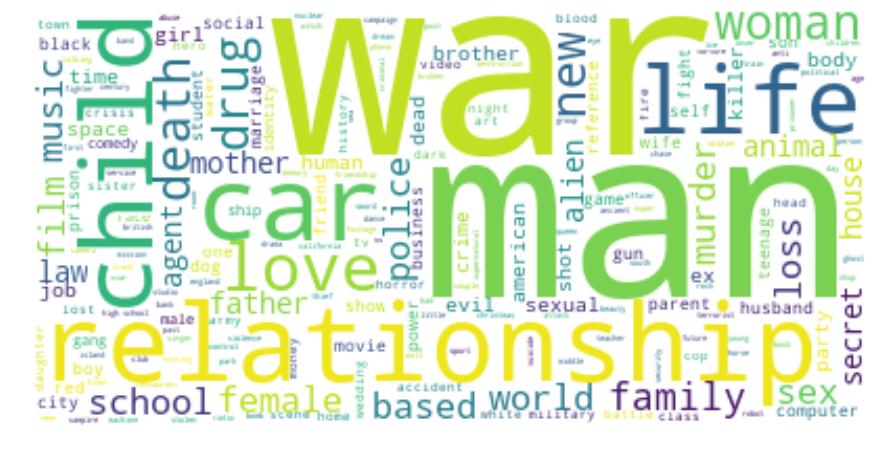

In [6]:
# List of the movies of the 21st century.
df21Century = dfMain[(dfMain['release_year'] >= 2000) & (dfMain['release_year'] < 2100) ]
# We get the ids from the selected movies
listIdsMovies = utl.getMovieIds(df21Century)
# Getting the list of keywords
keybordsList = utl.getKeyboardsFromMovies(dfKW, listIdsMovies)
# Words not to take into account
sWords = {'and', 'in', 'of', 'the', 'on','to', 'title','reference','female','male','by'}
# We create the word cloud
wc = WordCloud(background_color='white').generate(keybordsList)
plt.rcParams["figure.figsize"] = [15, 10]
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [7]:
# Saving memory
df21Century = [] 
listIdsMovies = []
keybordsList = []

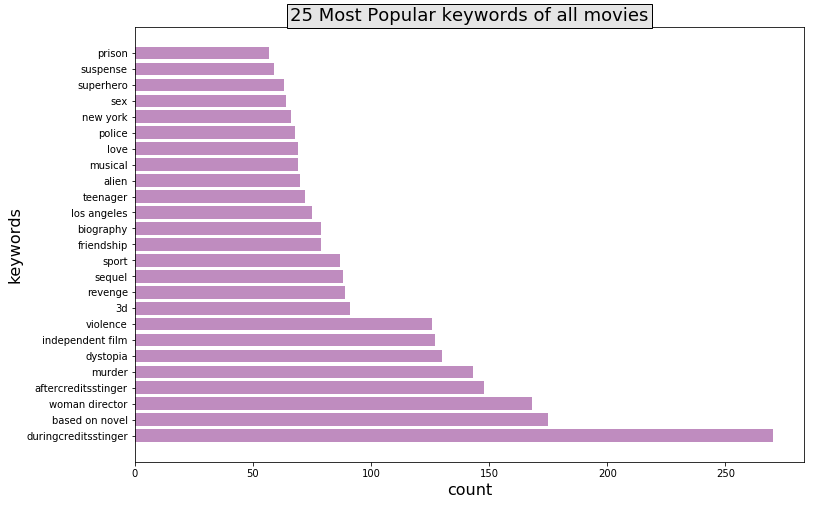

In [8]:
# We aggrupate keybords by name, then sort them by count.
dfKWGrouped = dfKW.groupby(['name']).count().reset_index()
# Renaming the column.
dfKWGrouped = dfKWGrouped.rename(columns ={"movie_id": 'count'})
# Sorting the keybords and getting the first 25
dfKWGrouped = dfKWGrouped.sort_values(by="count", ascending=False).head(25)
# Convert the dataframe to a list which only contains the sorted Keybords.
keywordsList = dfKWGrouped['name'].tolist()
# Convert the dataframe to a list which only contains the sorted Counts.
countList = dfKWGrouped['count'].tolist()
# Obtaining the length of the objects list
y_pos = np.arange(len(keywordsList))

# Creating the plot
plt.figure(figsize=(12, 8))
plt.barh(y_pos, countList, align='center', alpha=0.5, color = (0.5,0.1,0.5,0.6))
plt.yticks(y_pos, keywordsList)
plt.xlabel('count', fontsize=16)
plt.ylabel('keywords', fontsize=16)
plt.title('25 Most Popular keywords of all movies', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
# Showing the plot
plt.show()


In [9]:
# Saving memory
dfKW = []
dfKWGrouped = []
keybordsList = []
countList = []

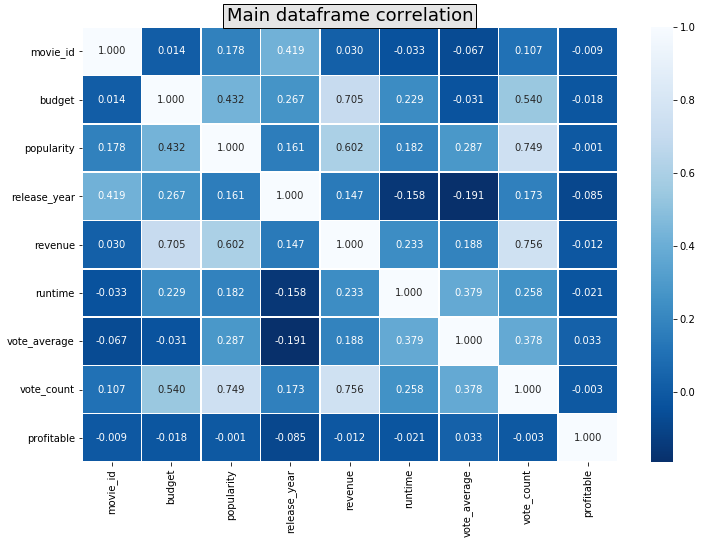

In [44]:
# Lists of numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Obtain dataframe containing only numeric data
dfMainNumerics = dfMain.select_dtypes(include=numerics)
# Creating figure
plt.figure(figsize=(12, 8))
seaborn.heatmap(dfMainNumerics.corr(), annot = True, fmt = ".3f", linewidths = .5, cmap = 'Blues_r');
plt.title('Main dataframe correlation', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

In [11]:
# Saving memory
dfMainNumerics = []

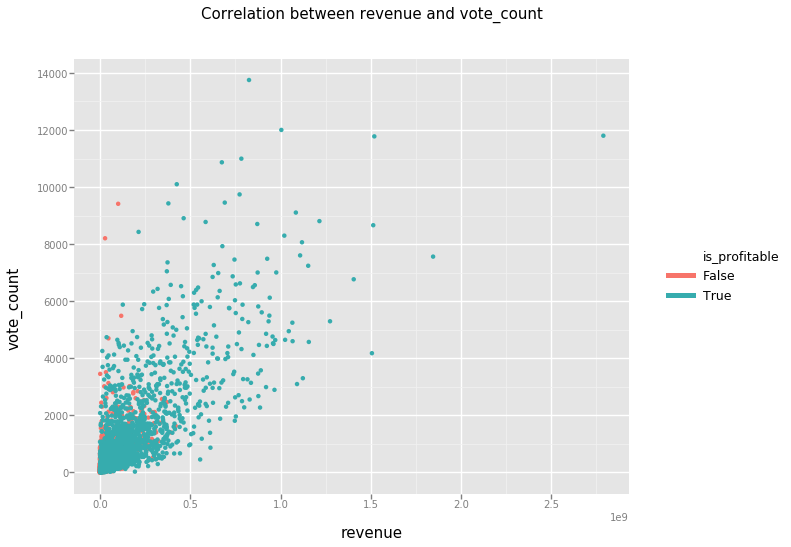

<ggplot: (124941311650)>

In [55]:
p = ggplot(aes(x='revenue', y='vote_count', color='is_profitable'), data=dfMain) +\
        geom_point() +\
        scale_fill_brewer() +\
        ggtitle("Correlation between revenue and vote_count")
        
t = theme_gray()
t._rcParams['font.size'] = 15 # Legend font size
t._rcParams['xtick.labelsize'] = 10 # xaxis tick label size
t._rcParams['ytick.labelsize'] = 10 # yaxis tick label size
t._rcParams['axes.labelsize'] = 8  # axis label size
p + t

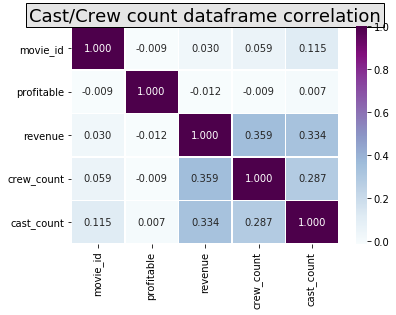

In [14]:
# We obtain a dataframe containing the movie, crew/cast count and revenue to see its correlacion
df = utl.addColCountJson(pd, dfMerge, ['crew', 'cast'], ['profitable', 'revenue'])

# Creating figure
plt.figure(figsize=(6, 4))
seaborn.heatmap(df.corr(), annot = True, fmt = ".3f", linewidths = .5, cmap = 'BuPu');
plt.title('Cast/Crew count dataframe correlation', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

In [15]:
# Saving memory
df = []
dfMergeCastCrew = []

In [14]:
df = dfMain[['release_year','revenue','budget']].groupby('release_year', as_index=False).sum()

trace1 = go.Scatter( x= df["release_year"], y= df["budget"], fill='tozeroy', name = 'Revenue')
trace2 = go.Scatter( x= df["release_year"], y= df["revenue"], fill='tonexty', name = 'budget')

layout = go.Layout(
    title='Evolution of budget vs revenue',
    yaxis=dict(
        title= 'Thousands of millions'
    )
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)


""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename='basic-area')

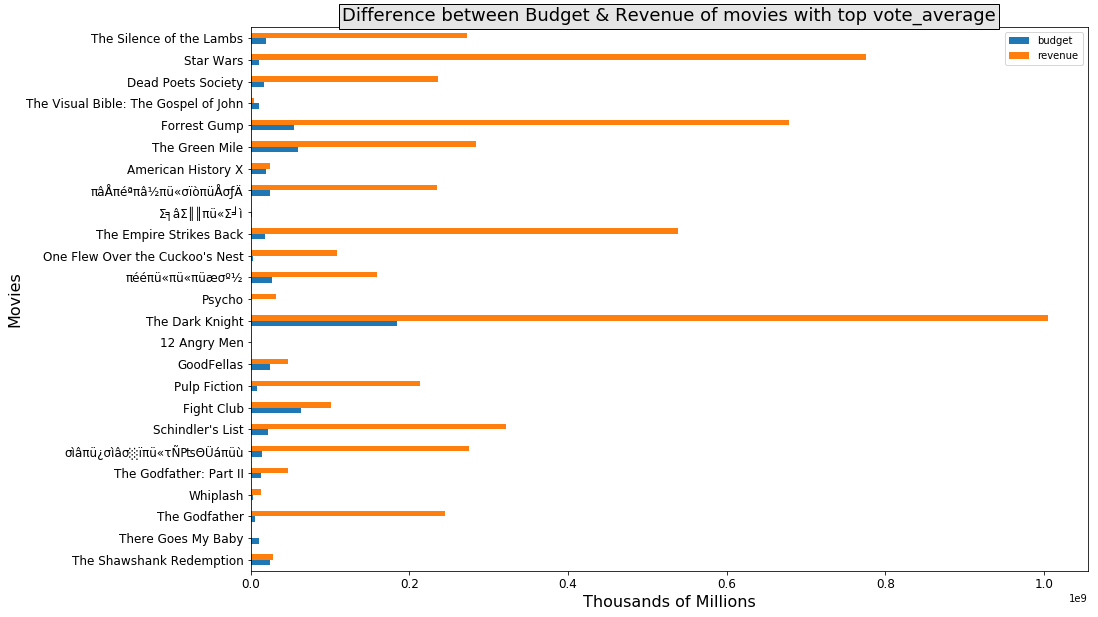

In [116]:
# We will use our function to make a subset  30 movies top budget
dfTopBudget = utl.getTopDataframe(dfMain, 'vote_average', 25)
labels = (dfTopBudget['original_title'])
ax = dfTopBudget[['budget','revenue']].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
ax.set_yticklabels(labels, minor=False)
ax.set_ylabel("Movies", fontsize=16)
ax.set_xlabel("Thousands of Millions", fontsize=16)
ax.set_title("Difference between Budget & Revenue of movies with top vote_average", 
             fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

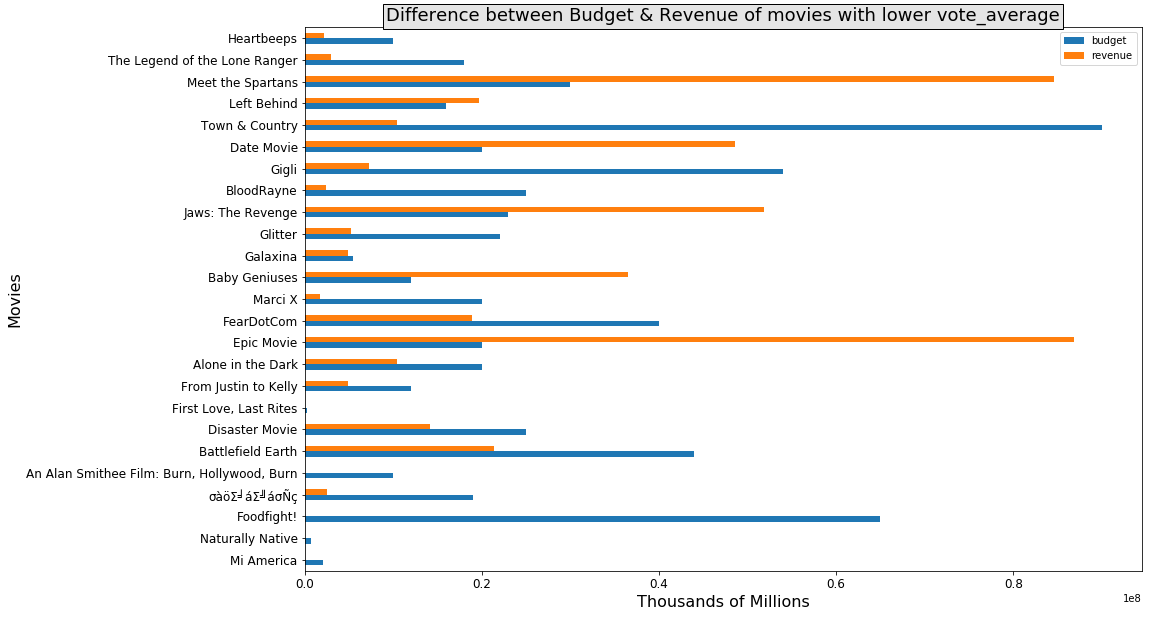

In [117]:
# We will use our function to make subset with 30 movies lowest vote_average
dfLowerBudget = utl.getLowerDataframe(dfMain, 'vote_average', 25)

labels = dfLowerBudget['original_title']
ax = dfLowerBudget[['budget','revenue']].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
ax.set_yticklabels(labels, minor=False)
ax.set_ylabel("Movies", fontsize=16)
ax.set_xlabel("Thousands of Millions", fontsize=16)
ax.set_title("Difference between Budget & Revenue of movies with lower vote_average", 
             fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
plt.show()

In [121]:
# get movies with lower budget 
dfLowerBudget = utl.getLowerDataframe(dfMain, 'budget', 20)[['budget','revenue', 'original_title']]
# To show the graph
trace1 = go.Bar(
    orientation = 'h', y= dfLowerBudget["original_title"], x=dfLowerBudget["budget"], name='Budget',
    marker=dict(color='rgb(158,202,225)', line=dict( color='rgb(8,48,107)', width=1.5)),
    opacity=0.6 )

trace2 = go.Bar(
    orientation = 'h', y=dfLowerBudget["original_title"], x=dfLowerBudget["revenue"], name='Revenue',
    marker=dict( color='rgba(219, 64, 82, 0.7)', line=dict( color='rgba(219, 64, 82, 1.0)', width=1.5 )),
    opacity=0.6 )

data = [trace1, trace2]
layout = go.Layout(
    title='Difference between Budget & Revenue of movies with lower budget',
    barmode='stack',
    yaxis=dict(
        showticklabels=True
    ),
    margin=dict( l=160, r=10, t=140, b=80
    )
)

fig = dict(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='stacked-bar')

In [126]:
# Get movies with top budget
dfTopBudget = utl.getTopDataframe(dfMain, 'budget', 20)[['budget','revenue', 'original_title']]
# To show the graph
trace1 = go.Bar(
    orientation = 'h', y= dfTopBudget["original_title"], x=dfTopBudget["budget"], name='Budget',
    marker=dict(color='rgb(158,202,225)', line=dict( color='rgb(8,48,107)', width=1.5)),
    opacity=0.6 )

trace2 = go.Bar(
    orientation = 'h', y=dfTopBudget["original_title"], x=dfTopBudget["revenue"], name='Revenue',
    marker=dict( color='rgba(219, 64, 82, 0.7)', line=dict( color='rgba(219, 64, 82, 1.0)', width=1.5 )),
    opacity=0.6 )

data = [trace1, trace2]
layout = go.Layout(
    title='Difference between Budget & Revenue of movies with top budget',
    barmode='stack',
    yaxis=dict(
        showticklabels=True
    ),
    margin=dict( l=250, r=10, t=140, b=80
    )
)

fig = dict(data=data, layout=layout)
fig = go.Figure(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename='stacked-bar')

In [ ]:
# Saving memory
df = []
dfTopBudget = []
dfLowerBudget = []

In [5]:
# We obtain the dataframes we will use
dfGenres = utl.getJSONDataFrame(pd, dfMerge, 'genres')

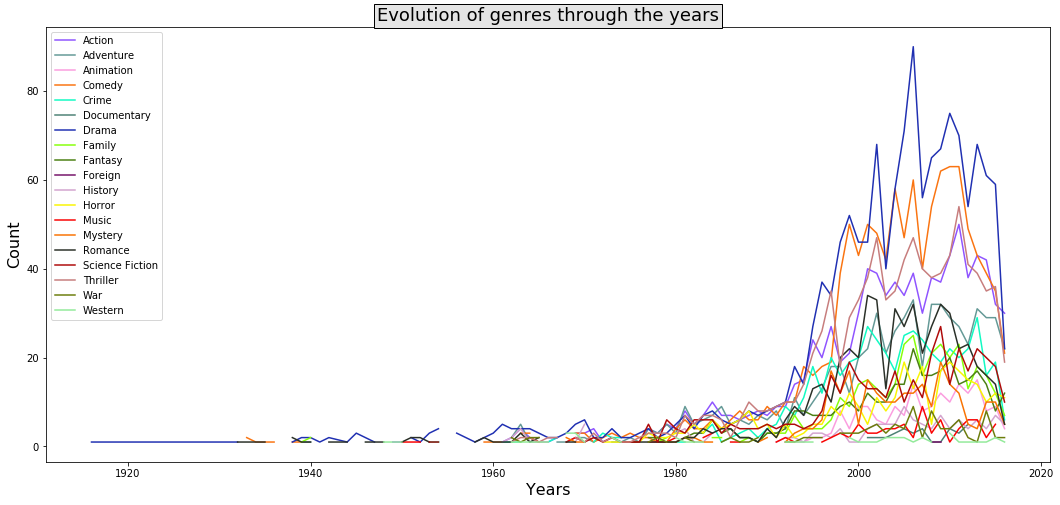

In [8]:
# Merge of the dataframes
dfMainGenres = dfMain.merge(dfGenres, on = 'movie_id')
dfMainGenres['count'] = 0
# We pivot the table in order to be able to run the plot
dfMainGenres = dfMainGenres.pivot_table(dfMainGenres, index=['release_year','name'], aggfunc='count')['count']
dfMainGenres = dfMainGenres.unstack()

# Obtain a dictionary of colors
colors = utl.getColorsDictionary()
# We create the figure
fig, ax = plt.subplots(figsize=(18,8))

# For every column (which are the genres), we will draw a line across the plot symbolizing the specific genre.
for i in range(len(dfMainGenres.columns)):
    ax.plot(dfMainGenres.iloc[:, i],  color = colors.get(i) )

plt.ylabel('Count',fontsize=16);
plt.xlabel('Years', fontsize=16);
plt.title('Evolution of genres through the years', fontsize=18, bbox={'facecolor':'1.9', 'pad':3})
pylab.legend(loc = 'upper left')
plt.show()

In [6]:
# We obtain the dataframes we will use
dfCast = utl.getJSONDataFrame(pd, dfMerge, 'cast')

In [8]:
# Merging
dfGenderCast = dfGenres.merge(dfCast,on='movie_id')
dfGenderCast = pd.DataFrame(dfGenderCast.groupby(('name_x','name_y')).count()['order'])
dfMainGenres = dfGenres.merge(dfMain[dfMain["release_year"] > 2000 ], on='movie_id')
# These are the most popular genres
genreList = ["Drama", "Comedy", "Thriller"]
# We create a new dataframe containing the columns genre and actor that we will fill
dfPopularActorGenre21st = pd.DataFrame(columns=['genre', 'actor'])
# Filling the new dataframe with the most popular actor for each genre
i = 0
for genre in genreList:
    nameActor = dfGenderCast.loc[genre].sort_values("order", ascending = False).head(1).index.get_level_values('name_y')[0]
    dfPopularActorGenre21st.loc[i, 'genre'] = genre
    dfPopularActorGenre21st.loc[i, 'actor'] = nameActor
    i = i + 1

# Showing the table
trace = go.Table(
    header=dict(values=['Genre', 'Actor'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[dfPopularActorGenre21st['genre'],
                       dfPopularActorGenre21st['actor']],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=500, height=300)
data = [trace]
layout = go.Layout(
    dict(width=500, height=300),
    title='Most popular actor by genre of the 21st Century'
)

fig = dict(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename = 'styled_table')


In [25]:
# We only considerate appropiate to use non NaN values or values that equal 1 or 2
dfCast = dfCast[(dfCast['gender'] == 1) | (dfCast['gender'] == 2)]
# Merge of dfMain with genres and cast
dfGenderCast = dfMainGenres.merge(dfCast, on='movie_id')
# Grouping by actor and gender
dfActorSex = dfGenderCast.groupby(by= ['name_x','gender']).count()['name_y']
dfActorSex.unstack(level= 1)

# We create an empty dataframe that will containg the genre and the percent of females casting in that genre
dfFemPercent = pd.DataFrame(columns=['genre', 'PercentFemale'])

# We define the most popular genres of the 21st Century
genreList = ["Drama", "Comedy", "Thriller"]

i = 0
for genre in genreList:
    dfFemPercent.loc[i, 'genre'] = genre
    f = int(dfActorSex.loc[genre][1])
    m = int(dfActorSex.loc[genre][2])
    res = (f / (m + f) * 100)
    dfFemPercent.loc[i, 'PercentFemale'] = round(res, 2)
    i = i + 1
np.random.rand(5).astype(np.object)
# Showing the table
trace = go.Table(
    header=dict(values=['Genre', 'PercentFemale'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[dfFemPercent['genre'],
                       dfFemPercent['PercentFemale']],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = go.Layout(
    dict(width=500, height=300),
    title='% of females in the most popular genres of the 21st Century'
)

data = [trace]
fig = dict(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename = 'styled_table')

In [57]:
# We obtain the data
dfGenderPerYear = utl.getGenderPerYear(pd, dfMain, dfCast)

# To show the graph
trace1 = go.Scatter( x= dfGenderPerYear["release_year"], y= dfGenderPerYear["female_count"],  
                name = 'female_count', mode='lines',
                line=dict(width=0.5, color='rgb(143, 19, 131)'),
                fill='tonexty')

trace2 = go.Scatter( x= dfGenderPerYear["release_year"], y= dfGenderPerYear["male_count"], 
                name = 'male_count', mode='lines',
                line=dict(width=0.5, color='rgb(127, 166, 238)'),
                fill='tonexty')

layout = go.Layout(
    title='Evolution of man vs women',
    yaxis=dict(
        title= 'count'
    ),
    xaxis=dict(
        title= 'years'
    )
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename='basic-area')

In [ ]:
# To save memory
dfMainGenres = []
dfCast = []
dfGenderCast = []
dfGenderActorSex = []

In [9]:
# We convert the json files into a dataframe
dfProduction_companies = utl.getJSONDataFrame(pd, dfMerge, 'production_companies')

In [13]:
# We get the most profitable companies
dfMainCompanies = pd.merge(dfProduction_companies, dfMain, on= 'movie_id')
dfMostProfCompanies = dfMainCompanies.groupby('name').sum().sort_values(by = 'profitable', ascending=False).head(10)

dfMostProfCompanies

# Showing the table
trace = go.Table(
    header=dict(values=['Company', 'Profitable'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['center'] * 5),
    cells=dict(values=[dfMostProfCompanies.index.values,
                       round(dfMostProfCompanies['profitable'], 2)],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['center'] * 5))

layout = go.Layout(
    title='Most profitable companies'
)

data = [trace]
fig = dict(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename='basic-area')

In [ ]:
# We get the names of the most profitable companies
companiesNames = dfMostProfCompanies.index.values

# Print the graph
trace2 = go.Bar(x= companiesNames, y= dfMostProfCompanies.budget.tolist(), name= 'Budget', marker= dict(color = 'pink'))
trace1= go.Bar(x= companiesNames, y= dfMostProfCompanies.revenue.tolist(), name= 'Revenue', marker= dict(color = 'green'))

data = [trace2, trace1]
layout = go.Layout(
    title='Top 10 most profitable companies',
    yaxis=dict(
        title= 'Thousands of millions'
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename='style-bar')

In [21]:
# We get the movie ids in which those profitable companies work
movieIds = dfProduction_companies[dfProduction_companies['name'].isin(companiesNames)]['movie_id'].tolist()
# We get the genres in which those top 10 profitable companies invest
dfSortedGenres = dfGenres[dfGenres['movie_id'].isin(movieIds)].groupby('name').count().sort_values(by= "index", ascending=False)

# Print the graph
trace0 = go.Bar(
    x= dfSortedGenres.index.tolist(),
    y=dfSortedGenres.id.tolist()
)

data = [trace0]
layout = go.Layout(
    title='Genres in which the top 10 profitable companies invest',
)

fig = go.Figure(data=data, layout=layout)

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
# py.iplot(fig, filename='text-hover-bar')

In [5]:
# To save memory
dfProduction_companies = []
dfMainCompanies = []
companiesNames = []
dfSortedGenres = []
movieIds = []

In [4]:
# Returns a dataframe with the languages most used in movies
dfMergeLanguagesMainGB = utl.getMostUsedLanguagesDataFrame(pd, dfMain)
# Getting a dataframe with worldwide geolocations
dfGeo = utl.getGeoLocations(pd)
# We merge
dfMergeGeoLanguages = pd.merge(dfMergeLanguagesMainGB, dfGeo, on = "ISO 3166 Country Code")
# Read the data with productions countries
dfCountries = utl.getJSONDataFrame(pd, dfMerge, 'production_countries')

In [6]:
# Groupby to get repetitions per country
dfCountries2 = dfCountries.groupby(["iso_3166_1", "name"]).size().reset_index(name="Time")
# Rename column to be able to merge with geolocations
dfCountries2.columns = ['ISO 3166 Country Code', 'Country', 'Time']
dfCountriesMerge = pd.merge(dfGeo, dfCountries2)
dfCountriesMerge.head()

# Make a data frame with dots to show on the map
dfCountriesMerge

row_index = dfCountriesMerge.Time == 2908
# then with the form .loc[row_indexer,col_indexer]
dfCountriesMerge.loc[row_index, 'Time'] = 800.0
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# Adding a marker one by one on the map
for i in range(0,len(dfCountriesMerge)):
   folium.Circle(
      location=[dfCountriesMerge.iloc[i]['Latitude'], dfCountriesMerge.iloc[i]['Longitude']],
      popup=dfCountriesMerge.iloc[i]['ISO 3166 Country Code'],
      radius=dfCountriesMerge.iloc[i]['Time']*3000,
      color='blue',
      fill=True,
      fill_color='blue'
      ).add_to(m)

# Show the plot

""" This line works, but when you upload this to github, it won't show, therefore, we took a picture of 
    the result and put it below 
"""
#display(m)

In [ ]:
# To save memory
dfMergeLanguagesMainGB = []
dfGeo = []
dfMergeGeoLanguages = []
dfCountries = []
dfCountries2 = []